In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import sys
import os
from keras.applications.vgg16 import VGG16
import keras
from numpy import load
import tensorflow

from sklearn.model_selection import train_test_split
from keras import backend
from keras.layers import Dense
from keras.layers import Flatten
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.optimizers import SGD
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import os


In [ ]:
train_dir='/content/drive/MyDrive/model/train'
test_dir='/content/drive/MyDrive/model/test'

In [ ]:
batch_size = 10
epochs = 6
img_height = 224
img_width = 224

In [ ]:
train_image_generator = ImageDataGenerator(rescale=1./255)
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,directory=train_dir,shuffle=True,target_size=(img_height, img_width),class_mode='categorical')

Found 1650 images belonging to 5 classes.


In [ ]:
val_image_generator = ImageDataGenerator(rescale=1./255)
val_data_gen = val_image_generator .flow_from_directory(batch_size=batch_size,directory=test_dir,shuffle=True,target_size=(img_height, img_width),class_mode='categorical')

Found 835 images belonging to 5 classes.


#**VGG16**

In [ ]:
base_model = VGG16(weights = 'imagenet', include_top=False, input_shape=(img_width, img_height, 3))


In [ ]:
base_model.trainable = False

In [ ]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
classifier=keras.models.Sequential()
classifier.add(base_model)
classifier.add(Flatten())
classifier.add(Dense(5,activation='softmax'))
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 5)                 125445    
                                                                 
Total params: 14840133 (56.61 MB)
Trainable params: 125445 (490.02 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [ ]:
classifier.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = classifier.fit(train_data_gen, epochs=10,
validation_data= val_data_gen,)

Epoch 1/10
165/165 [==============================] - 31s 149ms/step - loss: 1.4304 - accuracy: 0.4509 - val_loss: 0.8203 - val_accuracy: 0.6683
Epoch 2/10
165/165 [==============================] - 15s 94ms/step - loss: 0.9069 - accuracy: 0.6509 - val_loss: 0.8116 - val_accuracy: 0.6623
Epoch 3/10
165/165 [==============================] - 15s 91ms/step - loss: 0.6956 - accuracy: 0.7291 - val_loss: 0.6979 - val_accuracy: 0.7353
Epoch 4/10
165/165 [==============================] - 15s 92ms/step - loss: 0.5769 - accuracy: 0.7830 - val_loss: 0.5356 - val_accuracy: 0.8240
Epoch 5/10
165/165 [==============================] - 15s 91ms/step - loss: 0.4434 - accuracy: 0.8424 - val_loss: 0.6754 - val_accuracy: 0.6826
Epoch 6/10
165/165 [==============================] - 15s 91ms/step - loss: 0.5421 - accuracy: 0.8018 - val_loss: 0.3808 - val_accuracy: 0.8647
Epoch 7/10
165/165 [==============================] - 15s 93ms/step - loss: 0.3578 - accuracy: 0.8703 - val_loss: 0.3179 - val_accuracy

In [ ]:
classifier.save('vgg_knee.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import numpy as np

In [ ]:
y=np.concatenate([val_data_gen.next()[1] for i in range(val_data_gen.__len__())])
true_labels=np.argmax(y, axis=-1)
prediction= classifier.predict(val_data_gen, verbose=2)
prediction_vgg=np.argmax(prediction, axis=-1)

84/84 - 5s - 5s/epoch - 57ms/step


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=85)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('  ')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
cm = confusion_matrix(y_true=true_labels, y_pred=prediction_vgg)

In [ ]:
cm_plot_labels = ["Normal","Doubtful","Mild","Moderate","Severe"]

  
[[248   0   0   0   0]
 [ 98 141   5   1   0]
 [ 10   0 112   1   0]
 [  1   0   1 114   0]
 [  1   0   0   0 102]]
Accuracy: 0.859
Precision: 0.977
Recall: 0.859
F-Measure: 0.859


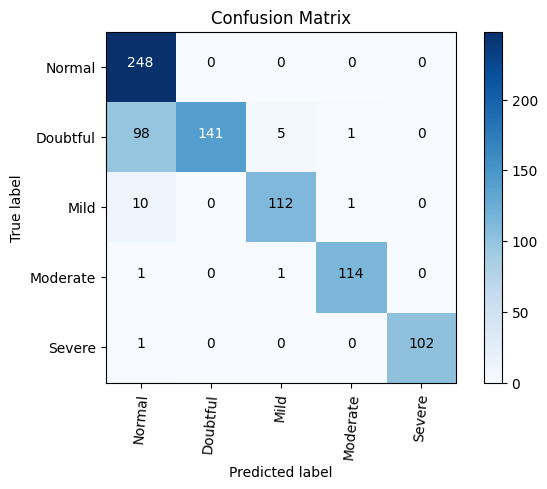

In [ ]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')
from sklearn.metrics import accuracy_score
acc=accuracy_score(true_labels,prediction_vgg)
print('Accuracy: %.3f' % acc)
from sklearn.metrics import precision_score
precision = precision_score(true_labels,prediction_vgg,labels=[1,2], average='micro')
print('Precision: %.3f' % precision)
from sklearn.metrics import recall_score
recall = recall_score(true_labels,prediction_vgg, average='micro')
print('Recall: %.3f' % recall)
from sklearn.metrics import f1_score
score = f1_score(true_labels,prediction_vgg, average='micro')
print('F-Measure: %.3f' % score)

#**Xception**

In [ ]:
base_model_xce = tf.keras.applications.Xception(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))


In [ ]:
base_model_xce.trainable = False

In [ ]:
base_model_xce.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 111, 111, 32)         864       ['input_2[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 111, 111, 32)         128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  (None, 111, 111, 32)         0         ['block1_conv1_bn[0][0]

In [ ]:
classifier_xce=keras.models.Sequential()
classifier_xce.add(base_model_xce)
classifier_xce.add(Flatten())
classifier_xce.add(Dense(5,activation='softmax'))
classifier_xce.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 flatten_1 (Flatten)         (None, 100352)            0         
                                                                 
 dense_1 (Dense)             (None, 5)                 501765    
                                                                 
Total params: 21363245 (81.49 MB)
Trainable params: 501765 (1.91 MB)
Non-trainable params: 20861480 (79.58 MB)
_________________________________________________________________


In [ ]:
classifier_xce.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history_xce = classifier_xce.fit(train_data_gen, epochs=10,validation_data= val_data_gen,)

Epoch 1/10
165/165 [==============================] - 27s 131ms/step - loss: 4.4663 - accuracy: 0.4903 - val_loss: 2.7125 - val_accuracy: 0.6527
Epoch 2/10
165/165 [==============================] - 21s 125ms/step - loss: 2.4359 - accuracy: 0.6836 - val_loss: 1.2631 - val_accuracy: 0.7844
Epoch 3/10
165/165 [==============================] - 15s 94ms/step - loss: 1.2467 - accuracy: 0.8055 - val_loss: 0.9825 - val_accuracy: 0.8551
Epoch 4/10
165/165 [==============================] - 22s 131ms/step - loss: 0.7954 - accuracy: 0.8485 - val_loss: 0.7217 - val_accuracy: 0.8754
Epoch 5/10
165/165 [==============================] - 16s 96ms/step - loss: 0.7801 - accuracy: 0.8721 - val_loss: 0.9022 - val_accuracy: 0.8371
Epoch 6/10
165/165 [==============================] - 15s 91ms/step - loss: 0.9416 - accuracy: 0.8630 - val_loss: 0.8707 - val_accuracy: 0.8443
Epoch 7/10
165/165 [==============================] - 15s 94ms/step - loss: 0.6717 - accuracy: 0.8903 - val_loss: 0.5065 - val_accura

In [ ]:
classifier_xce.save('Xceeption_knee.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
y=np.concatenate([val_data_gen.next()[1] for i in range(val_data_gen.__len__())])
true_labels=np.argmax(y, axis=-1)
prediction_xce= classifier_xce.predict(val_data_gen, verbose=2)
prediction_xce=np.argmax(prediction_xce, axis=-1)

84/84 - 5s - 5s/epoch - 60ms/step


In [ ]:
cm = confusion_matrix(y_true=true_labels, y_pred=prediction_xce)

In [ ]:
cm_plot_labels = ["Normal","Doubtful","Mild","Moderate","Severe"]

  
[[246   2   0   0   0]
 [ 16 229   0   0   0]
 [  4   4 115   0   0]
 [  0   0   0 116   0]
 [  0   1   0   0 102]]
Accuracy: 0.968
Precision: 0.980
Recall: 0.968
F-Measure: 0.968


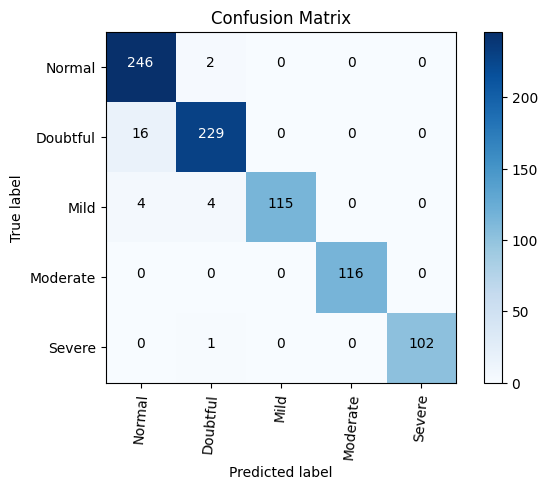

In [ ]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')
from sklearn.metrics import accuracy_score
acc=accuracy_score(true_labels,prediction_xce)
print('Accuracy: %.3f' % acc)
from sklearn.metrics import precision_score
precision = precision_score(true_labels,prediction_xce,labels=[1,2], average='micro')
print('Precision: %.3f' % precision)
from sklearn.metrics import recall_score
recall = recall_score(true_labels,prediction_xce, average='micro')
print('Recall: %.3f' % recall)
from sklearn.metrics import f1_score
score = f1_score(true_labels,prediction_xce, average='micro')
print('F-Measure: %.3f' % score)

#**Densnet121**

In [ ]:
base_model_dn = tf.keras.applications.DenseNet121(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

In [ ]:
base_model_dn.trainable = False
base_model_dn.summary()

Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 230, 230, 3)          0         ['input_3[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv1/conv (Conv2D)         (None, 112, 112, 64)         9408      ['zero_padding2d[0][0]']      
                                                                                                  
 conv1/bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1/conv[0][0]']

In [ ]:
classifier_dn=keras.models.Sequential()
classifier_dn.add(base_model_dn)
classifier_dn.add(Flatten())
classifier_dn.add(Dense(5,activation='softmax'))
classifier_dn.summary()
classifier_dn.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 7, 7, 1024)        7037504   
                                                                 
 flatten_2 (Flatten)         (None, 50176)             0         
                                                                 
 dense_2 (Dense)             (None, 5)                 250885    
                                                                 
Total params: 7288389 (27.80 MB)
Trainable params: 250885 (980.02 KB)
Non-trainable params: 7037504 (26.85 MB)
_________________________________________________________________


In [ ]:
history_dn = classifier_dn.fit(train_data_gen, epochs=10,validation_data= val_data_gen,)

Epoch 1/10
165/165 [==============================] - 30s 121ms/step - loss: 4.5399 - accuracy: 0.4915 - val_loss: 2.4157 - val_accuracy: 0.6946
Epoch 2/10
165/165 [==============================] - 16s 100ms/step - loss: 1.7767 - accuracy: 0.7279 - val_loss: 1.6101 - val_accuracy: 0.7437
Epoch 3/10
165/165 [==============================] - 15s 94ms/step - loss: 1.2866 - accuracy: 0.7836 - val_loss: 1.3550 - val_accuracy: 0.7760
Epoch 4/10
165/165 [==============================] - 17s 103ms/step - loss: 0.8506 - accuracy: 0.8564 - val_loss: 0.3220 - val_accuracy: 0.9174
Epoch 5/10
165/165 [==============================] - 15s 94ms/step - loss: 0.7222 - accuracy: 0.8733 - val_loss: 0.7546 - val_accuracy: 0.8671
Epoch 6/10
165/165 [==============================] - 16s 95ms/step - loss: 1.0755 - accuracy: 0.8545 - val_loss: 0.8523 - val_accuracy: 0.8958
Epoch 7/10
165/165 [==============================] - 16s 99ms/step - loss: 0.7024 - accuracy: 0.8988 - val_loss: 1.3847 - val_accura

In [ ]:
classifier_dn.save('dense121_knee.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
y=np.concatenate([val_data_gen.next()[1] for i in range(val_data_gen.__len__())])
true_labels=np.argmax(y, axis=-1)
prediction_dn= classifier_dn.predict(val_data_gen, verbose=2)
prediction_dn=np.argmax(prediction_dn, axis=-1)

84/84 - 6s - 6s/epoch - 76ms/step


In [ ]:
cm = confusion_matrix(y_true=true_labels, y_pred=prediction_dn)

  
[[215  30   1   2   0]
 [  4 233   0   8   0]
 [  0  15  81  26   1]
 [  0   0   0 116   0]
 [  0   1   0   8  94]]
Accuracy: 0.885
Precision: 0.870
Recall: 0.885
F-Measure: 0.885


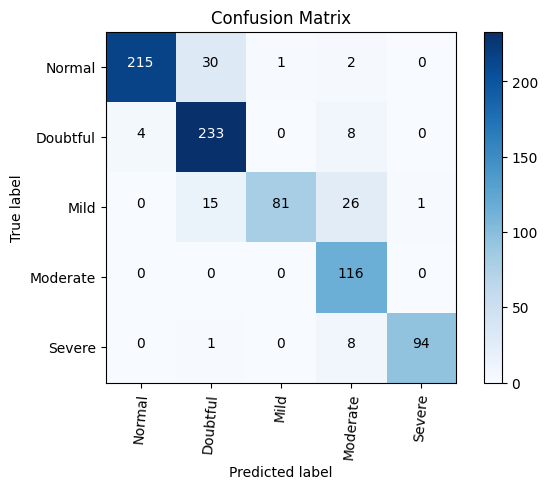

In [ ]:
cm_plot_labels = ["Normal","Doubtful","Mild","Moderate","Severe"]
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')
acc=accuracy_score(true_labels,prediction_dn)
print('Accuracy: %.3f' % acc)
precision = precision_score(true_labels,prediction_dn,labels=[1,2], average='micro')
print('Precision: %.3f' % precision)
recall = recall_score(true_labels,prediction_dn, average='micro')
print('Recall: %.3f' % recall)
score = f1_score(true_labels,prediction_dn, average='micro')
print('F-Measure: %.3f' % score)


#**RESNET**

In [ ]:
base_model_rn = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

In [ ]:
base_model_rn.trainable = False
base_model_rn.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_4[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [ ]:
classifier_rn=keras.models.Sequential()
classifier_rn.add(base_model_rn)
classifier_rn.add(Flatten())
classifier_rn.add(Dense(5,activation='softmax'))
classifier_rn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_3 (Flatten)         (None, 100352)            0         
                                                                 
 dense_3 (Dense)             (None, 5)                 501765    
                                                                 
Total params: 24089477 (91.89 MB)
Trainable params: 501765 (1.91 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [ ]:
classifier_rn.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history_rn=classifier_rn.fit(train_data_gen, epochs=10,validation_data= val_data_gen,)

Epoch 1/10
165/165 [==============================] - 23s 103ms/step - loss: 3.3644 - accuracy: 0.2667 - val_loss: 2.1159 - val_accuracy: 0.1497
Epoch 2/10
165/165 [==============================] - 16s 98ms/step - loss: 2.4598 - accuracy: 0.2685 - val_loss: 3.6276 - val_accuracy: 0.2958
Epoch 3/10
165/165 [==============================] - 15s 93ms/step - loss: 2.4154 - accuracy: 0.2939 - val_loss: 3.0752 - val_accuracy: 0.1449
Epoch 4/10
165/165 [==============================] - 16s 94ms/step - loss: 3.1073 - accuracy: 0.2897 - val_loss: 2.0402 - val_accuracy: 0.2982
Epoch 5/10
165/165 [==============================] - 21s 129ms/step - loss: 2.1868 - accuracy: 0.3339 - val_loss: 1.8120 - val_accuracy: 0.3677
Epoch 6/10
165/165 [==============================] - 15s 89ms/step - loss: 2.9957 - accuracy: 0.2921 - val_loss: 2.1382 - val_accuracy: 0.3257
Epoch 7/10
165/165 [==============================] - 15s 92ms/step - loss: 2.4488 - accuracy: 0.3412 - val_loss: 1.5669 - val_accurac

In [ ]:
classifier_rn.save('Resnet_knee.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
y=np.concatenate([val_data_gen.next()[1] for i in range(val_data_gen.__len__())])
true_labels=np.argmax(y, axis=-1)
prediction_rn= classifier_rn.predict(val_data_gen, verbose=2)
prediction_rn=np.argmax(prediction_rn, axis=-1)

84/84 - 5s - 5s/epoch - 62ms/step


In [ ]:
cm = confusion_matrix(y_true=true_labels, y_pred=prediction_rn)

  
[[105 138   0   5   0]
 [ 88 144   0  13   0]
 [ 30  54  12  27   0]
 [ 32  23   0  61   0]
 [ 14  67   1  21   0]]
Accuracy: 0.386
Precision: 0.355
Recall: 0.386
F-Measure: 0.386


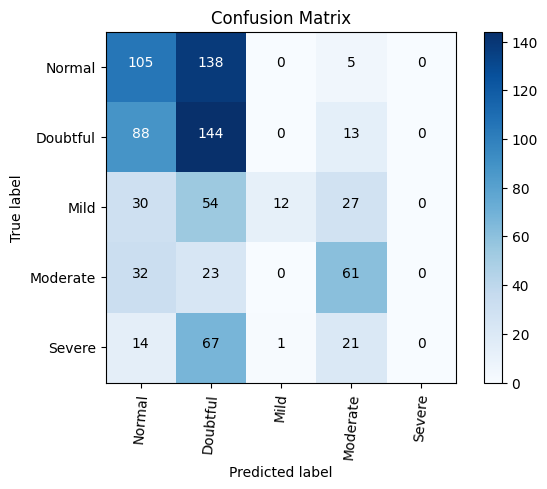

In [ ]:
cm_plot_labels = ["Normal","Doubtful","Mild","Moderate","Severe"]
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')
acc=accuracy_score(true_labels,prediction_rn)
print('Accuracy: %.3f' % acc)
precision = precision_score(true_labels,prediction_rn,labels=[1,2], average='micro')
print('Precision: %.3f' % precision)
recall = recall_score(true_labels,prediction_rn, average='micro')
print('Recall: %.3f' % recall)
score = f1_score(true_labels,prediction_rn, average='micro')
print('F-Measure: %.3f' % score)


#**EfficientNet07**

In [ ]:
base_model_en = tf.keras.applications.EfficientNetB7(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

In [ ]:
base_model_en.trainable = False
base_model_en.summary()

Model: "efficientnetb7"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 224, 224, 3)          0         ['input_5[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 224, 224, 3)          7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescaling)     (None, 224, 224, 3)          0         ['normalization[0

In [ ]:
classifier_en=keras.models.Sequential()
classifier_en.add(base_model_en)
classifier_en.add(Flatten())
classifier_en.add(Dense(5,activation='softmax'))
classifier_en.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb7 (Functional  (None, 7, 7, 2560)        64097687  
 )                                                               
                                                                 
 flatten_4 (Flatten)         (None, 125440)            0         
                                                                 
 dense_4 (Dense)             (None, 5)                 627205    
                                                                 
Total params: 64724892 (246.91 MB)
Trainable params: 627205 (2.39 MB)
Non-trainable params: 64097687 (244.51 MB)
_________________________________________________________________


In [ ]:
classifier_en.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history_en = classifier_en.fit(train_data_gen, epochs=10,validation_data= val_data_gen,)

Epoch 1/10
165/165 [==============================] - 66s 239ms/step - loss: 23.2143 - accuracy: 0.2394 - val_loss: 19.1889 - val_accuracy: 0.1234
Epoch 2/10
165/165 [==============================] - 31s 187ms/step - loss: 16.9305 - accuracy: 0.2267 - val_loss: 10.6520 - val_accuracy: 0.1389
Epoch 3/10
165/165 [==============================] - 31s 188ms/step - loss: 19.3763 - accuracy: 0.2345 - val_loss: 6.8187 - val_accuracy: 0.2958
Epoch 4/10
165/165 [==============================] - 41s 252ms/step - loss: 15.0839 - accuracy: 0.2212 - val_loss: 30.5954 - val_accuracy: 0.2970
Epoch 5/10
165/165 [==============================] - 31s 187ms/step - loss: 12.2901 - accuracy: 0.2630 - val_loss: 15.7486 - val_accuracy: 0.2934
Epoch 6/10
165/165 [==============================] - 31s 189ms/step - loss: 16.4579 - accuracy: 0.2527 - val_loss: 26.8466 - val_accuracy: 0.1234
Epoch 7/10
165/165 [==============================] - 31s 187ms/step - loss: 16.9972 - accuracy: 0.2315 - val_loss: 8.4

In [ ]:
classifier_en.save('efficient_knee.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
y=np.concatenate([val_data_gen.next()[1] for i in range(val_data_gen.__len__())])
true_labels=np.argmax(y, axis=-1)
prediction_en= classifier_en.predict(val_data_gen, verbose=2)
prediction_en=np.argmax(prediction_en, axis=-1)

84/84 - 15s - 15s/epoch - 177ms/step


In [ ]:
cm = confusion_matrix(y_true=true_labels, y_pred=prediction_en)

  
[[  0   0   0 248   0]
 [  0   0   0 245   0]
 [  0   0   0 123   0]
 [  0   0   0 116   0]
 [  0   0   0 103   0]]
Accuracy: 0.139
Precision: 0.000
Recall: 0.139
F-Measure: 0.139


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


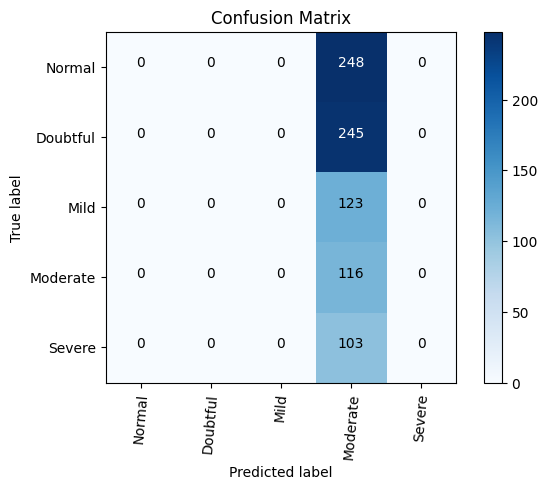

In [ ]:
cm_plot_labels = ["Normal","Doubtful","Mild","Moderate","Severe"]
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')
acc=accuracy_score(true_labels,prediction_en)
print('Accuracy: %.3f' % acc)
precision = precision_score(true_labels,prediction_en,labels=[1,2], average='micro')
print('Precision: %.3f' % precision)
recall = recall_score(true_labels,prediction_en, average='micro')
print('Recall: %.3f' % recall)
score = f1_score(true_labels,prediction_en, average='micro')
print('F-Measure: %.3f' % score)



#**Inception Model**

In [ ]:
model = Sequential()

base_model_in = tensorflow.keras.applications.InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


In [ ]:
base_model_in.trainable = False
base_model_in.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_4 (Conv2D)           (None, 111, 111, 32)         864       ['input_6[0][0]']             
                                                                                                  
 batch_normalization_4 (Bat  (None, 111, 111, 32)         96        ['conv2d_4[0][0]']            
 chNormalization)                                                                                 
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalizati

In [ ]:
classifier_in=keras.models.Sequential()
classifier_in.add(base_model_in)
classifier_in.add(Flatten())
classifier_in.add(Dense(5,activation='softmax'))
classifier_in.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten_5 (Flatten)         (None, 51200)             0         
                                                                 
 dense_5 (Dense)             (None, 5)                 256005    
                                                                 
Total params: 22058789 (84.15 MB)
Trainable params: 256005 (1000.02 KB)
Non-trainable params: 21802784 (83.17 MB)
_________________________________________________________________


In [ ]:
classifier_in.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history_in = classifier_in.fit(train_data_gen, epochs=10,validation_data= val_data_gen,)

Epoch 1/10
165/165 [==============================] - 24s 107ms/step - loss: 5.0335 - accuracy: 0.5176 - val_loss: 2.2496 - val_accuracy: 0.7054
Epoch 2/10
165/165 [==============================] - 15s 88ms/step - loss: 2.5431 - accuracy: 0.7388 - val_loss: 3.4274 - val_accuracy: 0.6898
Epoch 3/10
165/165 [==============================] - 16s 99ms/step - loss: 1.8970 - accuracy: 0.7964 - val_loss: 1.0338 - val_accuracy: 0.8719
Epoch 4/10
165/165 [==============================] - 15s 92ms/step - loss: 1.4749 - accuracy: 0.8394 - val_loss: 1.2447 - val_accuracy: 0.8695
Epoch 5/10
165/165 [==============================] - 15s 88ms/step - loss: 0.9588 - accuracy: 0.8861 - val_loss: 0.3699 - val_accuracy: 0.9473
Epoch 6/10
165/165 [==============================] - 15s 89ms/step - loss: 0.5739 - accuracy: 0.9176 - val_loss: 0.2197 - val_accuracy: 0.9737
Epoch 7/10
165/165 [==============================] - 15s 90ms/step - loss: 0.5984 - accuracy: 0.9230 - val_loss: 0.3196 - val_accuracy

In [ ]:
classifier_in.save('inception_knee.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
y=np.concatenate([val_data_gen.next()[1] for i in range(val_data_gen.__len__())])
true_labels=np.argmax(y, axis=-1)
prediction_in= classifier_in.predict(val_data_gen, verbose=2)
prediction_in=np.argmax(prediction_in, axis=-1)

84/84 - 5s - 5s/epoch - 64ms/step


In [ ]:
cm = confusion_matrix(y_true=true_labels, y_pred=prediction_in)

  
[[246   2   0   0   0]
 [  3 241   0   0   1]
 [  3  13 105   1   1]
 [  0   0   0 116   0]
 [  0   0   0   0 103]]
Accuracy: 0.971
Precision: 0.958
Recall: 0.971
F-Measure: 0.971


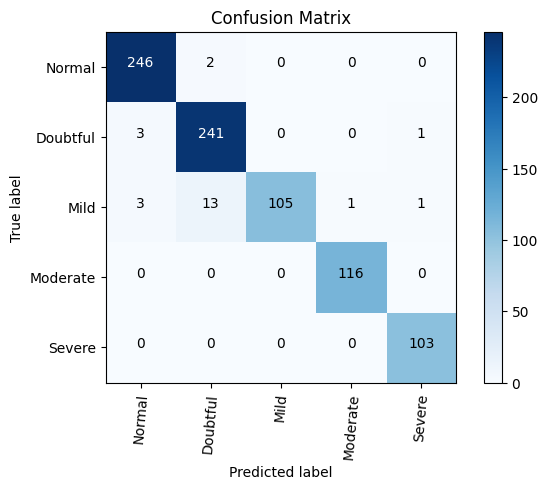

In [ ]:
cm_plot_labels = ["Normal","Doubtful","Mild","Moderate","Severe"]
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')
acc=accuracy_score(true_labels,prediction_in)
print('Accuracy: %.3f' % acc)
precision = precision_score(true_labels,prediction_in,labels=[1,2], average='micro')
print('Precision: %.3f' % precision)
recall = recall_score(true_labels,prediction_in, average='micro')
print('Recall: %.3f' % recall)
score = f1_score(true_labels,prediction_in, average='micro')
print('F-Measure: %.3f' % score)

#**Ensemble Model**

In [ ]:
vgg = tf.keras.models.load_model('/content/vgg_knee.h5')

In [ ]:
dn = tf.keras.models.load_model('/content/dense121_knee.h5')

In [ ]:
xce = tf.keras.models.load_model('/content/Xceeption_knee.h5')

In [ ]:
inc = tf.keras.models.load_model('/content/inception_knee.h5')

In [ ]:
yhat_vgg = vgg.predict(val_data_gen)
yhat_dn = dn.predict(val_data_gen)
yhat_xce = xce.predict(val_data_gen)
yhat_inc = inc.predict(val_data_gen)

84/84 [==============================] - 7s 65ms/step


In [ ]:
prediction_enm = (prediction_vgg + prediction_dn+prediction_xce+prediction_in) / 4.0


In [ ]:
for i in range(0, len(prediction_enm)):
    prediction_enm[i] = int(prediction_enm[i])


In [ ]:
cm = confusion_matrix(y_true=true_labels, y_pred=prediction_enm)

  
[[ 95 129  24   0   0]
 [ 56 130  56   3   0]
 [ 17  76  28   2   0]
 [  3  62  48   3   0]
 [  0  37  55  11   0]]
Accuracy: 0.307
Precision: 0.245
Recall: 0.307
F-Measure: 0.307


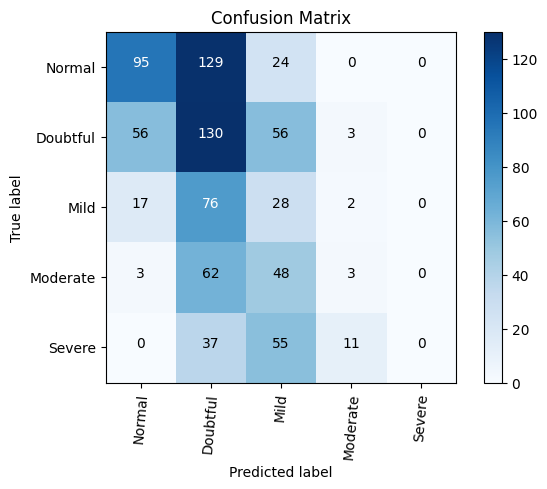

In [ ]:
cm_plot_labels = ["Normal","Doubtful","Mild","Moderate","Severe"]
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')
acc=accuracy_score(true_labels,prediction_enm)
print('Accuracy: %.3f' % acc)
precision = precision_score(true_labels,prediction_enm,labels=[1,2], average='micro')
print('Precision: %.3f' % precision)
recall = recall_score(true_labels,prediction_enm, average='micro')
print('Recall: %.3f' % recall)
score = f1_score(true_labels,prediction_enm, average='micro')
print('F-Measure: %.3f' % score)